In [1]:
import numpy as np
import matplotlib.pyplot as plt
import MigPreFuncoes
import SlantStack
import scipy

Imported MigPreFuncoes now
Imported SlantStack now


In [12]:
fr=40
nps=200
dt=.005 
rick=MigPreFuncoes.ricker(nps,fr,dt)

sx=10  #index position
sz=0  #index position
nx=110
nz=100;
dt=.005
ntr=nx
dx=10  #meters
dz=dx  #meters


c=1992



tmax = np.sqrt((dx*nx)**2+(dz*nz)**2)*2/c
nt=int(np.ceil(tmax/dt+1))
#print(nt)
nd2=nt+1; 
W=np.zeros(2*nt);
#print(W.shape)
W[nt:nt+nps-1]=rick[0:nps-1];
x=np.arange(0,nx)
z=np.arange(0,nz)

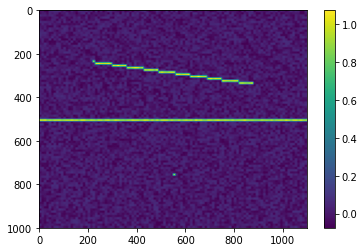

In [13]:
[X,Z]=np.meshgrid(x,z)
zz=(dz*Z)**2
X=(dx*X)                                          
R=X*0.0;

#Refletor Horizontal    
for i in range(int(0),int(nx)):
    R[int(np.round(nz/2)),i]=1
    
#Refletor Dip
x_ini = int(np.round(1*nx/5))
x_fim = int(np.round(4*nx/5))
theta=30

for i in range(x_ini,x_fim):
    z = int(np.round(i*np.cos(theta)) + np.round(nz/5))
    R[z,i]=1

#Ponto Difrator
R[int(np.round(6*nz/8)),int(np.round(nx/2))]=1

nn = np.random.rand(nz,nx)
R = R+(nn-0.5)*0.15

plt.imshow(R, extent=[0, nx*dx, nz*dz, 0], aspect='auto')
plt.colorbar()
plt.show()

In [14]:
#Vagarosidade

SW=np.ones([nz,nx])*1/c

In [15]:
with open('../Data/CSG_diffbar/Tabti/raiosTabti.npy', 'rb') as f:
    TTh = np.load(f)

timer=np.round(TTh/dt)+1

print(f"TTh.shape={TTh.shape}")

TTh.shape=(110, 100, 110)


In [16]:
files = []

for i in range(nx):
    filename = '../Data/CSG_diffbar/Tabti/dipangle_example_{}'.format(i)
    with open(filename, 'rb') as file:
        (gather) = np.load(file)
        files.append(gather)

In [21]:
isx = 55 #55
filename = '../Data/CSG_diffbar/Tabti/gather_shotTabti{}'.format(int(isx))
with open(filename, 'rb') as file:
    gather1h = np.load(file)

In [26]:
mig=np.zeros([nz,nx])
tabti=np.zeros([nz,ntr])
profile=55
isx = 55

z=int(np.round(6*nz/8)) # pontinho
tempo_d=np.zeros([nz,ntr])

for igx in range(0,ntr):
        t = timer[isx,0:nz,0:nx] + timer[igx,0:nz,0:nx] #t_{d}
        t2 = (t<nt)*t
        trace1=gather1h.T[np.ix_([igx],t2.flatten().astype(np.int32))] 
        trace1 = trace1.reshape([nz,nx]) #seção? imshow em um separado
        mig[0:nz,0:nx]=mig[0:nz,0:nx] + trace1
        tabti[0:nz,igx]=trace1[0:nz,profile]
        tempo_d[0:nz,igx]=t2[0:nz,profile]

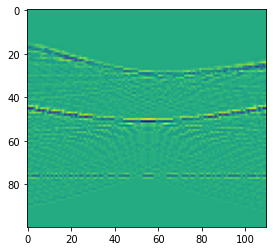

In [27]:
plt.imshow(tabti)